In [28]:
from sklearn.datasets import fetch_openml

# loading mnist dataset
mnist = fetch_openml('mnist_784', version=1)

In [46]:
from sklearn.model_selection import train_test_split

# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    mnist['data'].to_numpy(), mnist['target'].to_numpy().astype(int), test_size=0.15, shuffle=False
)



print(X_train.shape)
print(y_train.shape)

(59500, 784)
(59500,)


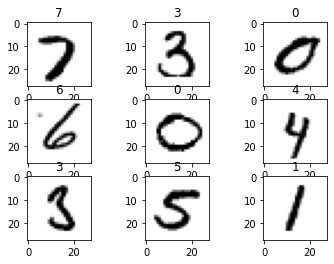

In [48]:
import matplotlib.pyplot as plt
import random

# plotting some digits
fig, axs = plt.subplots(3, 3)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        k = random.randint(0, len(X_train))
        digit = X_train[k]
#         print(digit)
        digit_image = digit.reshape(28, 28)
        
        axs[i, j].imshow(digit_image, cmap = 'binary')
        axs[i, j].set_title(f'{y_train[k]}')
plt.show()

In [50]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# training an SGD classifier to recognize digit 6
y_train_6 = (y_train == 6)
y_test_6 = (y_test == 6)

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_6)

# cross-validation
score = cross_val_score(sgd_clf, X_train, y_train_6, cv = 3, scoring='accuracy')
print(score)

[0.98265605 0.97962991 0.97897444]


In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

# confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_6, cv = 3)
confusion_matrix(y_train_6, y_train_pred)

array([[52839,   798],
       [  351,  5512]], dtype=int64)

Precision: 0.87
Recall: 0.94


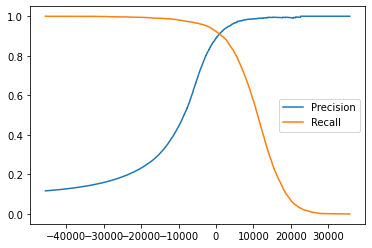

In [56]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

# prediction and recall
print(f'Precision: {precision_score(y_train_6, y_train_pred):.2f}')
print(f'Recall: {recall_score(y_train_6, y_train_pred):.2f}')

# precision-recall curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_6, cv = 3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_6, y_scores)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.legend()
plt.show()